In [1]:
import numpy as np
import pandas as pd 
import warnings
warnings.filterwarnings('ignore')
from scipy.stats import chi2_contingency
from scipy import stats
import seaborn as sns

In [2]:
x=pd.read_csv('../_xlable4_withNa_AllColumns.txt')
y=pd.read_csv('../_targelable4_withNa_AllColumns.txt')

y=y[['Unnamed: 0','L190400']]

In [3]:
data= pd.merge(x,y, how='inner',left_on='Unnamed: 0', right_on='Unnamed: 0')
data['max']=np.min(data[['FIELD_6','FIELD_7']],axis=1)
data=data.drop(columns=['FIELD_6','FIELD_7'])

In [4]:
data=data.query('FIELD_15 !=1 and FIELD_17 !=1 and FIELD_22 != 1 and FIELD_24 != 1 and FIELD_16 != 1 and FIELD_23 != 1')
# data=data.query('FIELD_16 != 1 and FIELD_23 != 1')

In [5]:
# data=data[data.SEX==0]
# data=data[data.FIELD_15!=1]
# data=data[data.FIELD_17!=1]
# data=data[data.FIELD_22!=1]
# data=data[data.FIELD_24!=1]
# data=data[data.AGE>=40]
# data=data[data.AGE<50]

print(data.shape)

(159381, 408)


In [6]:
#split column types to categorical and numerical
numerical_cols = list(data.columns[~data.columns.str.startswith('FIELD')])
categorical_cols = list(data.columns[data.columns.str.startswith('FIELD')])

Calculate correlation Value - for numerical values
========

In [7]:
corr=data[numerical_cols].corr()
corr=corr.L190400_y
corrvalPD=pd.DataFrame()
corrvalPD['Col']=corr.index
corrvalPD['val']=abs(corr.values)

corrvalPD=corrvalPD.sort_values(by='val',ascending=False)
corrvalPD.head()

,Col,val
278,L190400_y,1.000000
134,L393800,1.000000
149,L500900,0.931342
71,L122000,0.928960
94,L190400_x,0.859893


In [8]:
#count of none NA values of feature set
mydataset=data.copy()[numerical_cols]
colCount=[]
for i in mydataset.columns:
    colCount.append([i,mydataset[i].dropna().shape[0]])

colCountPD=pd.DataFrame(colCount,columns=['Col','Count'])
colCountPD.head()

,Col,Count
0,Unnamed: 0,159381
1,index,159381
2,COMPARE,159381
3,AGE,159381
4,B_DAY,159381


In [9]:
mergedColCorrCount=pd.merge(corrvalPD,colCountPD,how='inner',left_on='Col',right_on='Col')
mergedColCorrCount=mergedColCorrCount[mergedColCorrCount.Count>50000]
mergedColCorrCount=mergedColCorrCount.sort_values(by='val', ascending=False)
mergedColCorrCount.head(20)

,Col,val,Count
0,L190400_y,1.000000,159244
4,L190400_x,0.859893,159241
5,L190500,0.833014,159204
6,SEX,0.731795,159381
7,L190300,0.723729,159204
12,S000100,0.533962,159302
13,L100500,0.521625,158954
15,L100700,0.511943,152474
19,L190800,0.415405,145304
24,L103300,0.375315,135222


In [10]:
print(list(mergedColCorrCount.head(20).Col))

['L190400_y', 'L190400_x', 'L190500', 'SEX', 'L190300', 'S000100', 'L100500', 'L100700', 'L190800', 'L103300', 'S000300', 'L104500', 'L190700', 'S000501', 'L103100', 'S000502', 'L101300', 'L104300', 'L103000', 'L190900']


Anova test - For categorical values [Questionnaire answers]
=======

In [11]:
mydataset=data.copy()[categorical_cols] #[np.insert(categorical_cols,0,'L100800')]

# mydataset=mydataset.drop(columns=['FIELD_1','FIELD_2','FIELD_8','FIELD_10','FIELD_11','FIELD_12','FIELD_39','FIELD_88',
#                            'FIELD_89','FIELD_109','FIELD_110','FIELD_111','FIELD_70','FIELD_82','FIELD_85','FIELD_91',
#                            'FIELD_103','FIELD_106'])

# mydataset=mydataset.drop(columns=['FIELD_1','FIELD_2','FIELD_87','FIELD_8','FIELD_10','FIELD_11','FIELD_12','FIELD_39',
#                                   'FIELD_88','FIELD_89', 'FIELD_108','FIELD_109','FIELD_110','FIELD_111','FIELD_82',
#                                  'FIELD_91','FIELD_103','FIELD_118','FIELD_119','FIELD_120','FIELD_121','FIELD_122',
#                                  'FIELD_123','FIELD_124','FIELD_125','FIELD_126','FIELD_127','FIELD_128','FIELD_129',
#                                  'FIELD_130','FIELD_131','FIELD_132','FIELD_133','FIELD_134','FIELD_135','FIELD_136',
#                                   'FIELD_137','FIELD_138','FIELD_139','FIELD_140'])


mydataset=mydataset.drop(columns=['FIELD_1','FIELD_2','FIELD_87','FIELD_8','FIELD_10','FIELD_11','FIELD_12','FIELD_39',
                                  'FIELD_88','FIELD_89', 'FIELD_108','FIELD_109','FIELD_110','FIELD_111','FIELD_82',
                                 'FIELD_91','FIELD_103','FIELD_118','FIELD_119','FIELD_120','FIELD_121','FIELD_122',
                                 'FIELD_123','FIELD_124','FIELD_125','FIELD_126','FIELD_127','FIELD_128','FIELD_129',
                                 'FIELD_130','FIELD_131','FIELD_132','FIELD_133','FIELD_134','FIELD_135','FIELD_136',
                                  'FIELD_137','FIELD_138','FIELD_139','FIELD_140',
                                  'FIELD_64','FIELD_65','FIELD_66','FIELD_67','FIELD_68','FIELD_69','FIELD_70','FIELD_72',
                                  'FIELD_73','FIELD_74','FIELD_75','FIELD_76','FIELD_77','FIELD_80','FIELD_81','FIELD_84',
                                  'FIELD_85','FIELD_90','FIELD_93','FIELD_94','FIELD_95','FIELD_96','FIELD_97','FIELD_98',
                                  'FIELD_101','FIELD_102','FIELD_105','FIELD_106','FIELD_112','FIELD_113','FIELD_114',
                                  'FIELD_115','FIELD_116','FIELD_117','FIELD_118','FIELD_119','FIELD_9'
                                 ])


mydataset=mydataset.drop(mydataset[mydataset.FIELD_3=='`'].index)
mydataset=mydataset.drop(mydataset[mydataset.FIELD_3=='G'].index)


mydataset=mydataset.drop(mydataset[mydataset.FIELD_4=='.'].index)
mydataset=mydataset.drop(mydataset[mydataset.FIELD_5=='.'].index)

mydataset=mydataset.drop(mydataset[mydataset.FIELD_35=='?'].index)
mydataset=mydataset.drop(mydataset[mydataset.FIELD_35=='.'].index)
mydataset=mydataset.drop(mydataset[mydataset.FIELD_36=='.'].index)
mydataset=mydataset.drop(mydataset[mydataset.FIELD_37=='\\'].index)
 
# mydataset=mydataset.drop(mydataset[mydataset.FIELD_39 == '7+' ].index)
# mydataset=mydataset.drop(mydataset[mydataset.FIELD_39 == '5~7'].index)
# mydataset=mydataset.drop(mydataset[mydataset.FIELD_39 == '3-4'].index)


# mydataset=mydataset.drop(mydataset[mydataset.FIELD_95=='.'].index)

In [12]:
colslist=mydataset.columns
DiabeticColVals=data.L190400_y

cor=[]
pval=[]
count=[]

for i in range(len(colslist)):
    print(i,colslist[i])
    
    temp=pd.DataFrame([])
    temp['a']=DiabeticColVals
    temp['b']=mydataset[colslist[i]].astype(float)
    temp=temp.dropna()
    count.append(temp.shape[0])
    
    uniquevalues=temp.b.unique()
    
    selectedGroupVals=[]
    for k in range(len(uniquevalues)):
        selectedGroupVals.append(np.asarray(temp[temp['b']==uniquevalues[k]].a))

    F, p = stats.f_oneway(*selectedGroupVals)
    cor.append(F)
    pval.append(p)
    

0 FIELD_3
1 FIELD_4
2 FIELD_5
3 FIELD_13
4 FIELD_14
5 FIELD_15
6 FIELD_16
7 FIELD_17
8 FIELD_18
9 FIELD_19
10 FIELD_20
11 FIELD_21
12 FIELD_22
13 FIELD_23
14 FIELD_24
15 FIELD_25
16 FIELD_26
17 FIELD_27
18 FIELD_28
19 FIELD_29
20 FIELD_30
21 FIELD_31
22 FIELD_32
23 FIELD_33
24 FIELD_34
25 FIELD_35
26 FIELD_36
27 FIELD_37
28 FIELD_38
29 FIELD_40
30 FIELD_41
31 FIELD_42
32 FIELD_43
33 FIELD_44
34 FIELD_45
35 FIELD_46
36 FIELD_47
37 FIELD_48
38 FIELD_49
39 FIELD_50
40 FIELD_51
41 FIELD_52
42 FIELD_53
43 FIELD_54
44 FIELD_55
45 FIELD_56
46 FIELD_57
47 FIELD_58
48 FIELD_59
49 FIELD_60
50 FIELD_61
51 FIELD_62
52 FIELD_63


In [13]:
FvalPvalCorr=pd.DataFrame()    
FvalPvalCorr['Cols']=colslist
FvalPvalCorr['F']=cor
FvalPvalCorr['P']=pval
FvalPvalCorr['Count']=count
FvalPvalCorr=FvalPvalCorr.sort_values(by='F', ascending=False)


In [14]:
FvalPvalCorr[FvalPvalCorr.Count>50000].head(10)

,Cols,F,P,Count
23,FIELD_33,8679.224481,0.000000e+00,158931
28,FIELD_38,2302.077829,0.000000e+00,158939
29,FIELD_40,552.122683,0.000000e+00,158945
19,FIELD_29,420.490430,2.521307e-93,159226
8,FIELD_18,347.009039,2.295804e-77,159226
15,FIELD_25,305.778010,2.104107e-68,159227
30,FIELD_41,239.204702,0.000000e+00,158915
31,FIELD_42,63.579897,1.464908e-104,158894
21,FIELD_31,50.523708,1.182252e-12,159227
1,FIELD_4,49.770569,3.280980e-71,156822


In [15]:
print(list(FvalPvalCorr[FvalPvalCorr.Count>50000].Cols)[:10])

['FIELD_33', 'FIELD_38', 'FIELD_40', 'FIELD_29', 'FIELD_18', 'FIELD_25', 'FIELD_41', 'FIELD_42', 'FIELD_31', 'FIELD_4']


========================= LASSO method
================

In [16]:
selectedcols=['L190400_y', 'L190400_x', 'L190500', 'SEX', 'L190300', 'S000100', 'L100500', 'L100700', 'L190800', 
              'L103300', 'S000300', 'L104500', 'L190700', 'S000501', 'L103100', 'S000502', 'L101300', 'L104300', 
              'L103000', 'L190900','FIELD_33', 'FIELD_38', 'FIELD_40', 'FIELD_29', 'FIELD_18', 'FIELD_25', 'FIELD_41', 
              'FIELD_42', 'FIELD_31', 'FIELD_4'
             ]
data2=data[selectedcols].copy().dropna()
print(data2.shape)

(68734, 30)


In [17]:
x=data2[['L190400_x', 'L190500', 'SEX', 'L190300', 'S000100', 'L100500', 'L100700', 'L190800', 
              'L103300', 'S000300', 'L104500', 'L190700', 'S000501', 'L103100', 'S000502', 'L101300', 'L104300', 
              'L103000', 'L190900','FIELD_33', 'FIELD_38', 'FIELD_40', 'FIELD_29', 'FIELD_18', 'FIELD_25', 'FIELD_41', 
              'FIELD_42', 'FIELD_31', 'FIELD_4'
        ]]
y=data2.L190400_y

In [18]:
from sklearn import linear_model
clf = linear_model.Lasso(alpha=0.1)
clf.fit(x,y)

print(clf.coef_)

print(clf.intercept_)  

# pd.DataFrame([x.columns.ravel(),clf.coef_.ravel()],columns=['Name','coeff'])

lassod=pd.DataFrame()
lassod['Name']=x.columns
lassod['coeff']=clf.coef_
lassod

lassod=lassod.drop(lassod[lassod.coeff==0].index)
lassod.coeff=abs(lassod.coeff)
lassod=lassod.sort_values(by='coeff', ascending=False)
lassod

[ 0.          0.24677985 -0.          0.          0.0154725   0.
  0.          0.15171848  0.          0.00761679 -0.00284666  0.
  0.00466497 -0.00708361  0.          0.00176358 -0.0019737   0.00043804
 -0.          0.          0.          0.         -0.         -0.
 -0.          0.          0.         -0.          0.        ]
-3.60830857630301


,Name,coeff
1,L190500,0.246780
7,L190800,0.151718
4,S000100,0.015473
9,S000300,0.007617
13,L103100,0.007084
12,S000501,0.004665
10,L104500,0.002847
16,L104300,0.001974
15,L101300,0.001764
17,L103000,0.000438


In [19]:
print(list(lassod.Name[:20]))

['L190500', 'L190800', 'S000100', 'S000300', 'L103100', 'S000501', 'L104500', 'L104300', 'L101300', 'L103000']


=============================== SelectKBest method
========================

In [20]:
# from sklearn.feature_selection import chi2
from sklearn.feature_selection import f_regression
from sklearn.feature_selection import SelectKBest

bestfeatures = SelectKBest(score_func=f_regression, k=10)
fit = bestfeatures.fit(x,y)

dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(x.columns)

featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns

# x=x[x.columns[:15]]
print(list(x.columns[:16]))

['L190400_x', 'L190500', 'SEX', 'L190300', 'S000100', 'L100500', 'L100700', 'L190800', 'L103300', 'S000300', 'L104500', 'L190700', 'S000501', 'L103100', 'S000502', 'L101300']


========================================= LinearSVC
===============

In [21]:
# from sklearn.svm import LinearSVC
# from sklearn.datasets import load_iris
# from sklearn.feature_selection import SelectFromModel

# lsvc = LinearSVC(C=0.01, penalty="l1", dual=False).fit(x, y)
# model = SelectFromModel(lsvc, prefit=True)
# X_new = model.transform(x)
# X_new.shape

In [22]:
# x.dtypes

================================ SequentialFeatureSelector 
================================

In [23]:
# from sklearn.linear_model import LinearRegression
# from mlxtend.feature_selection import SequentialFeatureSelector as SFS
# from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
# from sklearn.ensemble import RandomForestRegressor

# lr = RandomForestRegressor()

# sfs = SFS(lr, 
#           k_features=13, 
#           forward=True, 
#           floating=False, 
#           scoring='neg_mean_squared_error',
#           cv=5)

# sfs = sfs.fit(x, y)
# fig = plot_sfs(sfs.get_metric_dict(), kind='std_err')

# plt.title('Sequential Forward Selection (w. StdErr)')
# plt.grid()
# plt.show()

================================= feature_importances
=====

[0.1243095  0.08039976 0.54331993 0.01687816 0.01024435 0.0099164
 0.00997115 0.01583678 0.00959856 0.01062535 0.01269144 0.01932224
 0.01012801 0.01092721 0.00964187 0.01011709 0.0122219  0.01005303
 0.01323947 0.00589037 0.00910149 0.00790707 0.00432112 0.00160926
 0.00120864 0.00829472 0.00953858 0.00433004 0.00835652]


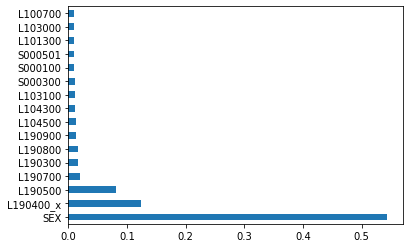

Index(['SEX', 'L190400_x', 'L190500', 'L190700', 'L190300', 'L190800',
       'L190900', 'L104500', 'L104300', 'L103100', 'S000300', 'S000100',
       'S000501', 'L101300', 'L103000', 'L100700'],
      dtype='object')


In [24]:
from sklearn.ensemble import ExtraTreesRegressor
import matplotlib.pyplot as plt
model = ExtraTreesRegressor()
model.fit(x,y)

print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers

#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=x.columns)
feat_importances.nlargest(16).plot(kind='barh')
plt.show()

print(feat_importances.nlargest(16).index)

============================= Backward Elimination
========

In [25]:
import statsmodels.regression.linear_model as sm
temp=x.copy()
temp['const']=np.ones((x.shape[0],1))
regressor_OLS = sm.OLS(endog = y, exog = temp).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              L190400_y   R-squared:                       0.769
Model:                            OLS   Adj. R-squared:                  0.769
Method:                 Least Squares   F-statistic:                     7877.
Date:                Thu, 10 Oct 2019   Prob (F-statistic):               0.00
Time:                        02:44:14   Log-Likelihood:                -74292.
No. Observations:               68734   AIC:                         1.486e+05
Df Residuals:                   68704   BIC:                         1.489e+05
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
L190400_x      0.6685      0.046     14.377      0.000       0.577       0.760
L190500       -0.0007      0.018     -0.038      0.970      -0.036       0.034
SEX           -0.6001      0.013    -47.633      0.000      -0.625      -0.575
L190300        0.0587      0.108      0.544      0.586      -0.153       0.270
S000100       -0.0005      0.000     -1.022      0.307      -0.001       0.000
L100500       -0.1673      0.020     -8.538      0.000      -0.206      -0.129
L100700       -0.0114      0.003     -4.104      0.000      -0.017      -0.006
L190800       -0.0319      0.023     -1.394      0.163      -0.077       0.013
L103300       -0.0264      0.004     -5.907      0.000      -0.035      -0.018
S000300        0.0119      0.001     11.095      0.000       0.010       0.014
L104500       -0.0020   7.05e-05    -28.429      0.000      -0.002      -0.002
L190700        0.0036      0.017      0.218      0.827      -0.029       0.036
S000501        0.0025      0.000      6.761      0.000       0.002       0.003
L103100       -0.0050      0.000    -14.967      0.000      -0.006      -0.004
S000502       -0.0007      0.000     -1.400      0.161      -0.002       0.000
L101300        0.0009      0.000      6.212      0.000       0.001       0.001
L104300       -0.0019   8.27e-05    -22.888      0.000      -0.002      -0.002
L103000        0.0002   3.99e-05      5.106      0.000       0.000       0.000
L190900       -0.0524      0.004    -11.839      0.000      -0.061      -0.044
FIELD_33       0.0250      0.004      6.061      0.000       0.017       0.033
FIELD_38       0.0129      0.002      5.315      0.000       0.008       0.018
FIELD_40       0.0048      0.002      2.044      0.041       0.000       0.009
FIELD_29       0.0054      0.008      0.670      0.503      -0.010       0.021
FIELD_18      -0.0428      0.024     -1.784      0.074      -0.090       0.004
FIELD_25       0.0269      0.029      0.929      0.353      -0.030       0.084
FIELD_41       0.0029      0.002      1.304      0.192      -0.001       0.007
FIELD_42       0.0027      0.001      2.095      0.036       0.000       0.005
FIELD_31       0.0063      0.008      0.765      0.444      -0.010       0.023
FIELD_4        0.0039      0.002      1.734      0.083      -0.001       0.008
const          6.9958      0.673     10.396      0.000       5.677       8.315
==============================================================================
Omnibus:                     4968.475   Durbin-Watson:                   2.171
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            27131.496
Skew:                          -0.025   Prob(JB):                         0.00
Kurtosis:                       6.078   Cond. No.                     8.59e+04
==============================================================================

W

In [26]:
# temp=temp.drop(columns=['L103100', 'S000300','L190400','L102900','L101300','S000501','S000502','L100500','FIELD_40',
#                         'FIELD_41','FIELD_29','FIELD_18','FIELD_31','FIELD_27','FIELD_25','SEX'])
# regressor_OLS = sm.OLS(endog = y, exog = temp).fit()
# regressor_OLS.summary()

In [27]:
# temp=temp.drop(columns=['FIELD_33'])
# regressor_OLS = sm.OLS(endog = y, exog = temp).fit()
# regressor_OLS.summary()

In [28]:
print(temp.columns.shape)
temp.columns

(30,)


Index(['L190400_x', 'L190500', 'SEX', 'L190300', 'S000100', 'L100500',
       'L100700', 'L190800', 'L103300', 'S000300', 'L104500', 'L190700',
       'S000501', 'L103100', 'S000502', 'L101300', 'L104300', 'L103000',
       'L190900', 'FIELD_33', 'FIELD_38', 'FIELD_40', 'FIELD_29', 'FIELD_18',
       'FIELD_25', 'FIELD_41', 'FIELD_42', 'FIELD_31', 'FIELD_4', 'const'],
      dtype='object')

================== Check Variance inflation factor and multi collinearity
==================== 

In [ ]:
temppd=pd.DataFrame(data2[['S000501_x', 'S000502', 'S000300', 'SEX', 'L190400', 'L190300', 'L190500', 'L100700', 
              'L103300', 'L100500', 'S000100', 'L100800', 'L103000', 'L101700', 'L101300', 'L103100', 'max',
              'FIELD_33', 'FIELD_38', 'FIELD_40', 'FIELD_29', 'FIELD_41', 'FIELD_27', 'FIELD_42', 'FIELD_5', 
              'FIELD_18', 'FIELD_25'
                          ]]).dropna()  
temppd['y']=data.S000501_y
 

corr = (temppd.corr())
sns.heatmap(corr, vmin=-1, vmax=1) 

corr.head(20)

In [ ]:

def vifcal(inputdata,depcol):
    vifL5=[]
    import statsmodels.formula.api as sm
    xvars=inputdata.drop([depcol],axis=1)
    xvarnames=xvars.columns
    for i in range(0,xvarnames.shape[0]):
        _y=xvars[xvarnames[i]]
        _x=xvars[xvarnames.drop(xvarnames[i])]
        rsq=sm.ols(formula="_y~_x",data=xvars).fit().rsquared
        vif=round(1/(1-rsq),2)
        print(i,', ',xvarnames[i]," VIF = ",vif)
        if(vif<5):
            vifL5.append(xvarnames[i])
    return vifL5
    
    
newcols = vifcal(temppd,'y')

In [ ]:
print(newcols,len(newcols))